# Lab Segmentation 2

In [70]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray
from skimage.color import rgba2rgb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


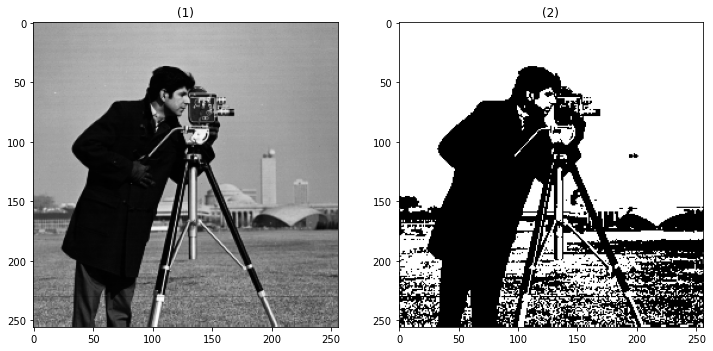

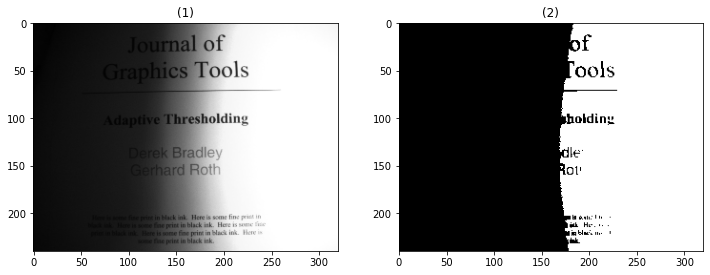

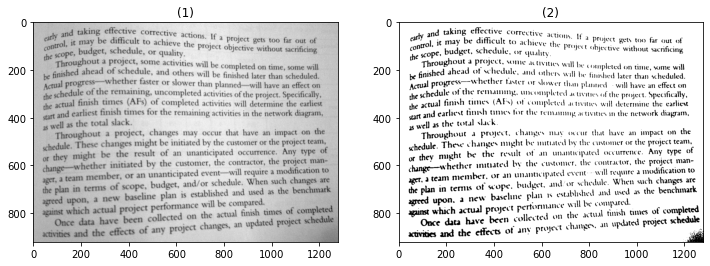

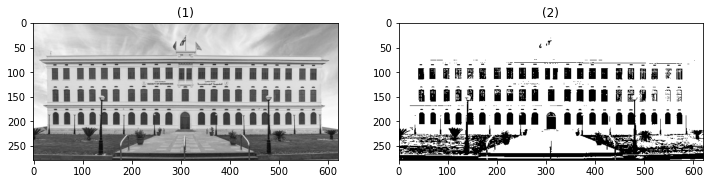

127.5 146.5 128.5 89.5


In [131]:
'''
1- Convert the image to Unit8. Hint: multiply the matrix by 255 and then use
astype(‘uint8’).
2- Get counts array that contains the number of pixels in each grey-level.Hint:use your
previously implemented function that calculated histogram.
3- Get initial threshold by getting the average mean of the pixels’ grey-level:
a. Tinit = 𝑟𝑜𝑢𝑛𝑑((∑𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝐺𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑠Per𝑘=0𝑔𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑘 ∗𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑃𝑖𝑥𝑒𝑙𝑠𝑘) / 𝑡𝑜𝑡𝑎𝑙 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑝𝑖𝑥𝑒𝑙𝑠 𝑖𝑛 𝑡ℎ𝑒 𝑖𝑚𝑎𝑔𝑒. )
→ Hint: you can get total number of pixel by using the cumulative sum and
find last element of it.
→Hint to get the last element of a vector, use the index -1 like M[-1].
4- Get the two weighted averages (means), one for the lower pixels (have gray level
less than Tinit) and the other for the higher pixels (have gray level more than Tinit).
→Hint: use the same method you got the Tinit to calculate the mean, just change the
gray levels range you are working on.
Hint: example to get the range from 0:9 → L=list(range(0,10))
5- Update the New threshold to be the average of the two means.
6- Repeat the same steps [4:5] until threshold saturates.
'''
def getTreshold(img):
    #step 1
    uimg=(img*255).astype('uint8')
    #step 2
    h = np.array(np.histogram(uimg.flatten(),256)[0])
    #step3
    Tinit=round((np.sum(np.multiply(h,np.arange(h.shape[0])))//np.cumsum(h)[-1]))
    Tlower=round((np.sum(np.multiply(h<Tinit,np.arange((h<Tinit).shape[0])))//np.cumsum(h<Tinit)[-1]))
    Tupper=round((np.sum(np.multiply(h>=Tinit,np.arange((h>=Tinit).shape[0])))//np.cumsum(h>=Tinit)[-1]))
    Told=Tinit
    Tnew = (Tlower+Tupper)/2
    while Tnew != Told:
        Tlower=round((np.sum(np.multiply(h<Tnew,np.arange((h<Tnew).shape[0])))//np.cumsum(h<Tnew)[-1]))
        Tupper=round((np.sum(np.multiply(h>=Tnew,np.arange((h>=Tnew).shape[0])))//np.cumsum(h>=Tnew)[-1]))
        Told=Tnew
        Tnew = (Tlower+Tupper)/2
    return Tnew

image1 = io.imread('cameraman.png')
show_images([image1,image1>getTreshold(image1)])
image2 = io.imread('book.png')
show_images([image2,image2>getTreshold(image2)])
image3 =rgb2gray(io.imread('book1.png'))
show_images([image3,image3*255>getTreshold(image3)])
image4 = rgb2gray(io.imread('cufe.png'))
show_images([image4,image4*255>getTreshold(image4)])

print(getTreshold(image1),getTreshold(image2),getTreshold(image3),getTreshold(image4))


146.5
120 160 240 320
167.5 170.0 70.0 69.5 146.5


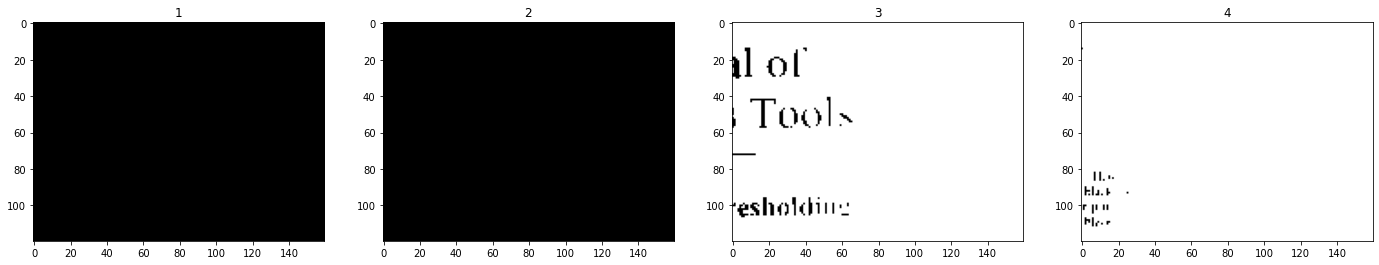

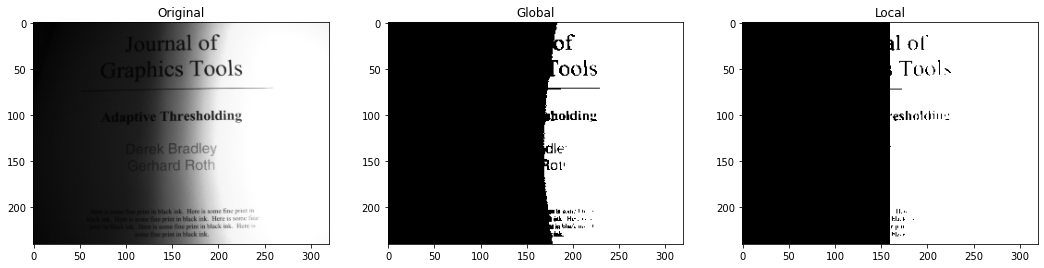

In [146]:
def local_thersholding(image):
    print(getTreshold(image))
    N, M = image.shape
    x, y = N//2, M//2 
    print(x,y,N,M)
    
    image_copy=np.copy(image)

    thr_1 = getTreshold(image_copy[0:x, 0:y])
    thr_2 = getTreshold(image_copy[x:N, 0:y])
    thr_3 = getTreshold(image_copy[0:x, y:M])
    thr_4 = getTreshold(image_copy[x:N, y:M])
    thr_all = getTreshold(image)
    print(thr_1,thr_2,thr_3,thr_4,thr_all)
    
#     image_copy[0:x, 0:y] = image_copy[0:x, 0:y]>thr_1
#     image_copy[x:N, 0:y] = image_copy[x:N, 0:y]>thr_2
#     image_copy[0:x, y:M] = image_copy[0:x, y:M]>thr_3
#     image_copy[x:N, y:M] = image_copy[x:N, y:M]>thr_4

    image_thr = image>thr_all
    
    image_copy[0:x, 0:y] = np.where(image_copy[0:x, 0:y]>thr_1,1,0)
    image_copy[x:N, 0:y] = np.where(image_copy[x:N, 0:y]>thr_2,1,0)
    image_copy[0:x, y:M] = np.where(image_copy[0:x, y:M]>thr_3,1,0)
    image_copy[x:N, y:M] = np.where(image_copy[x:N, y:M]>thr_4,1,0)
    image_thr = np.where(image>thr_all,1,0)
    
    
    show_images([ image_copy[0:x, 0:y],image_copy[x:N, 0:y], image_copy[0:x, y:M], image_copy[x:N, y:M]], ['1', '2','3','4'])
    
    return image_thr,image_copy


image1 = io.imread('book.png')
# print(image1)
image2,image3=local_thersholding(image1)
show_images([image1,image2,image3], ['Original', 'Global','Local'])

# image1 = io.imread('cameraman.png')
# # print(image1)
# image2,image3=local_thersholding(image1)
# show_images([image1,image2,image3], ['Original', 'Global','Local'])

# image1 = io.imread('book1.png')
# image1 = rgb2gray(image1)
# # print(image1)
# image1=(image1*255).astype('uint8')
# image2,image3=local_thersholding(image1)
# show_images([image1,image2,image3], ['Original', 'Global','Local'])

# image1 = io.imread('cufe.png')
# image1 = rgb2gray(image1)
# # print(image1)
# image1=(image1*255).astype('uint8')
# image2,image3=local_thersholding(image1)
# show_images([image1,image2,image3], ['Original', 'Global','Local'])


In [137]:
def local_thersholding_modify(image, no_of_partitios):
    
#     image = rgb2gray(io.imread(image_path))
    
    no_of_partitios_rows=int(np.sqrt(no_of_partitios)) #4->2 9->3 16->4
    N, M = image.shape
    x, y = N//no_of_partitios_rows, M//no_of_partitios_rows
    image_copy=np.copy(image)

#     result_image = np.zeros(image.shape)
    
    for i in range(0, N, x):
        for j in range(0, M, y):
            thr = getTreshold(image[i:i+x, j:j+y])
            image_copy[i:i+x, j:j+y] = image_copy[i:i+x, j:j+y]>thr
#             result_image[i:i+x, j:j+y] = np.where(image[i:i+x, j:j+y]>=thr,image[i:i+x, j:j+y],0)
    return image_copy

print('hi')
image = io.imread('book.png')
image4 = local_thersholding_modify(image, 4)
image9 = local_thersholding_modify(image, 9)
image16 = local_thersholding_modify(image, 16)
# image25 = local_thersholding_modify(image, 25)
# image36 = local_thersholding_modify(image, 36)
# show_images([image, image4, image9, image16, image25, image36], ['Original', '4', '9', '16', '25', '36'])
show_images([image, image4, image9, image16], ['Original', '4', '9', '16'])



hi


KeyboardInterrupt: 